In [ ]:
import heapq # Librería de Python para simular Colas de prioridad.
"""
La cola de prioridad es una estructura similar a un árbol binario de nodos,
en el cual los padres son aquellos con un valor menor o mayor al de sus hijos. En la librería heapq se prioritiza al menor
Su reordenamiento depende de la inclusión y/o extracción de los nodos

Ej: Este array a un arbol [9,4,2,5,7]
    9
 ----------
    2
  9
 ----------
    2
  9   4
 ----------
    2
  5   4
9
 ----------
    2
  5   4
7  9
"""
import numpy as np # Funciones matemáticas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure #Gráficas de la simulación
import time #Para calcular la velocidad

In [ ]:
def heuristico(a,b,modo):
    if modo==0:
        # Euclidiana
        return abs(a[0]-b[0])+abs(a[1]-b[1])
    elif modo==1:
        # Manhattan
        return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)
    else:
        return 0

In [ ]:
def algoritmoa(matriz, inicio, fin, modo):
    start = time.time()
    if modo==0:
        #dirección de ocho celdas, Euclidiana
        vecinos = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    elif modo==1:
        #dirección de cuatro celdas, Manhattan
        vecinos = [(0,1),(0,-1),(1,0),(-1,0)]

    cerrados = set()
    origen = {}
    g = {inicio:0}
    f= {inicio:heuristico(inicio, fin, modo)}

    abiertos = []

    heapq.heappush(abiertos, (f[inicio], inicio))
    while abiertos:
        # Sacar al nodo de menor costo f de la cola de abiertos
        actual = heapq.heappop(abiertos)[1]
        if actual == fin:
            data = []
            while actual in origen:
                #Llenar los datos de manera recursiva, desde el último hacia el primero
                data.append(actual)
                actual = origen[actual]
            end = time.time()
            print((end-start) * 10**3)
            return data
        cerrados.add(actual)
        for i, j in vecinos:
            # Por cada direccion disponible en el nodo actual, siendo
            vecino = actual[0] + i, actual[1] + j
            valor_ideal = g[actual] + heuristico(actual, vecino,modo)
            if 0 <= vecino[0] < matriz.shape[0]:
                if 0 <= vecino[1] < matriz.shape[1]:
                    # se topó con un obstáculo
                    if matriz[vecino[0]][vecino[1]] == 1:
                        continue
                else:
                    # no se topó con un obstáculo, pero sí con un límite en x
                    continue

            else:
                # no se topó con un obstáculo, pero sí con un límite en y
                continue

            if vecino in cerrados and valor_ideal >= g.get(vecino, 0):
                # Si el vecino ya está como un nodo tomado por el camino y su valor ideal heurístico de distancia
                # no es el óptimo (es mayor o igual a la distancia actual del vecino al nodo final)
                continue

            if  valor_ideal < g.get(vecino, 0) or vecino not in [i[1]for i in abiertos]:
                # Si el vecino no está dentro del set de nodos cerrados o su valor ideal heurístico de distancia
                # es menor a la distancia calculada

                origen[vecino] = actual
                g[vecino] = valor_ideal
                f[vecino] = valor_ideal + heuristico(vecino, fin,modo)

                # Llevar a la cola de prioridad abierta el nodo vecino con su valor f
                heapq.heappush(abiertos, (f[vecino], vecino))
    # Si no se encontró nada, devolver False
    end = time.time()
    print((end-start) * 10**3)
    return False

In [ ]:
def illustrateRoute(matriz,inicio,fin,y=[],x=[]):
    #Ilustrando la matriz y el camino a seguir
    fig, ax = plt.subplots(figsize=(20,20))
    ax.imshow(matriz, cmap=plt.cm.Dark2)
    ax.scatter(inicio[1],inicio[0], marker = "*", color = "yellow", s = 200)
    ax.scatter(fin[1],fin[0], marker = "*", color = "red", s = 200)
    titl='Mapa.jpg'
    if len(y)>0 or len(x)>0:
        ax.plot(x,y, color = "black")
        ax.set_title('Camino encontrado con el algoritmo A*',fontsize = 14)
        titl='Algoritmo A.jpg'
    plt.savefig(titl)
    plt.show()

In [ ]:
def makePath(matriz,inicio,fin, modo):
    ruta = algoritmoa(matriz, inicio, fin,modo)
    ruta = ruta + [inicio]
    ruta = ruta[::-1]
    print(ruta)

    x_s = []
    y_s = []
    for i in (range(0,len(ruta))):
        x = ruta[i][0]
        y = ruta[i][1]
        x_s.append(x)
        y_s.append(y)
    illustrateRoute(matriz,inicio,fin,x_s,y_s)
    return ruta

# Implementación del código en el proyecto

Crear el mapa de bloques de ciudad para el camión repartidor

In [ ]:
nmap = np.array([
    [0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1],
    [1,0,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1],
    [1,0,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1],
    [1,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
    [1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1],
    [1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1],
    [0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1],
    [1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,1,1,1,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0],
    [1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0],
    [1,0,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0],
    [1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,1,1,0,0],
    [1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,0],
    [1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,1],
    [1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1],
    [1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,1]])

#1=bloque
#0=ruta
inicio=(0,1) # De donde sale el camión
fin=(16,19) # Su destinatario
print(nmap.shape)

(20, 20)


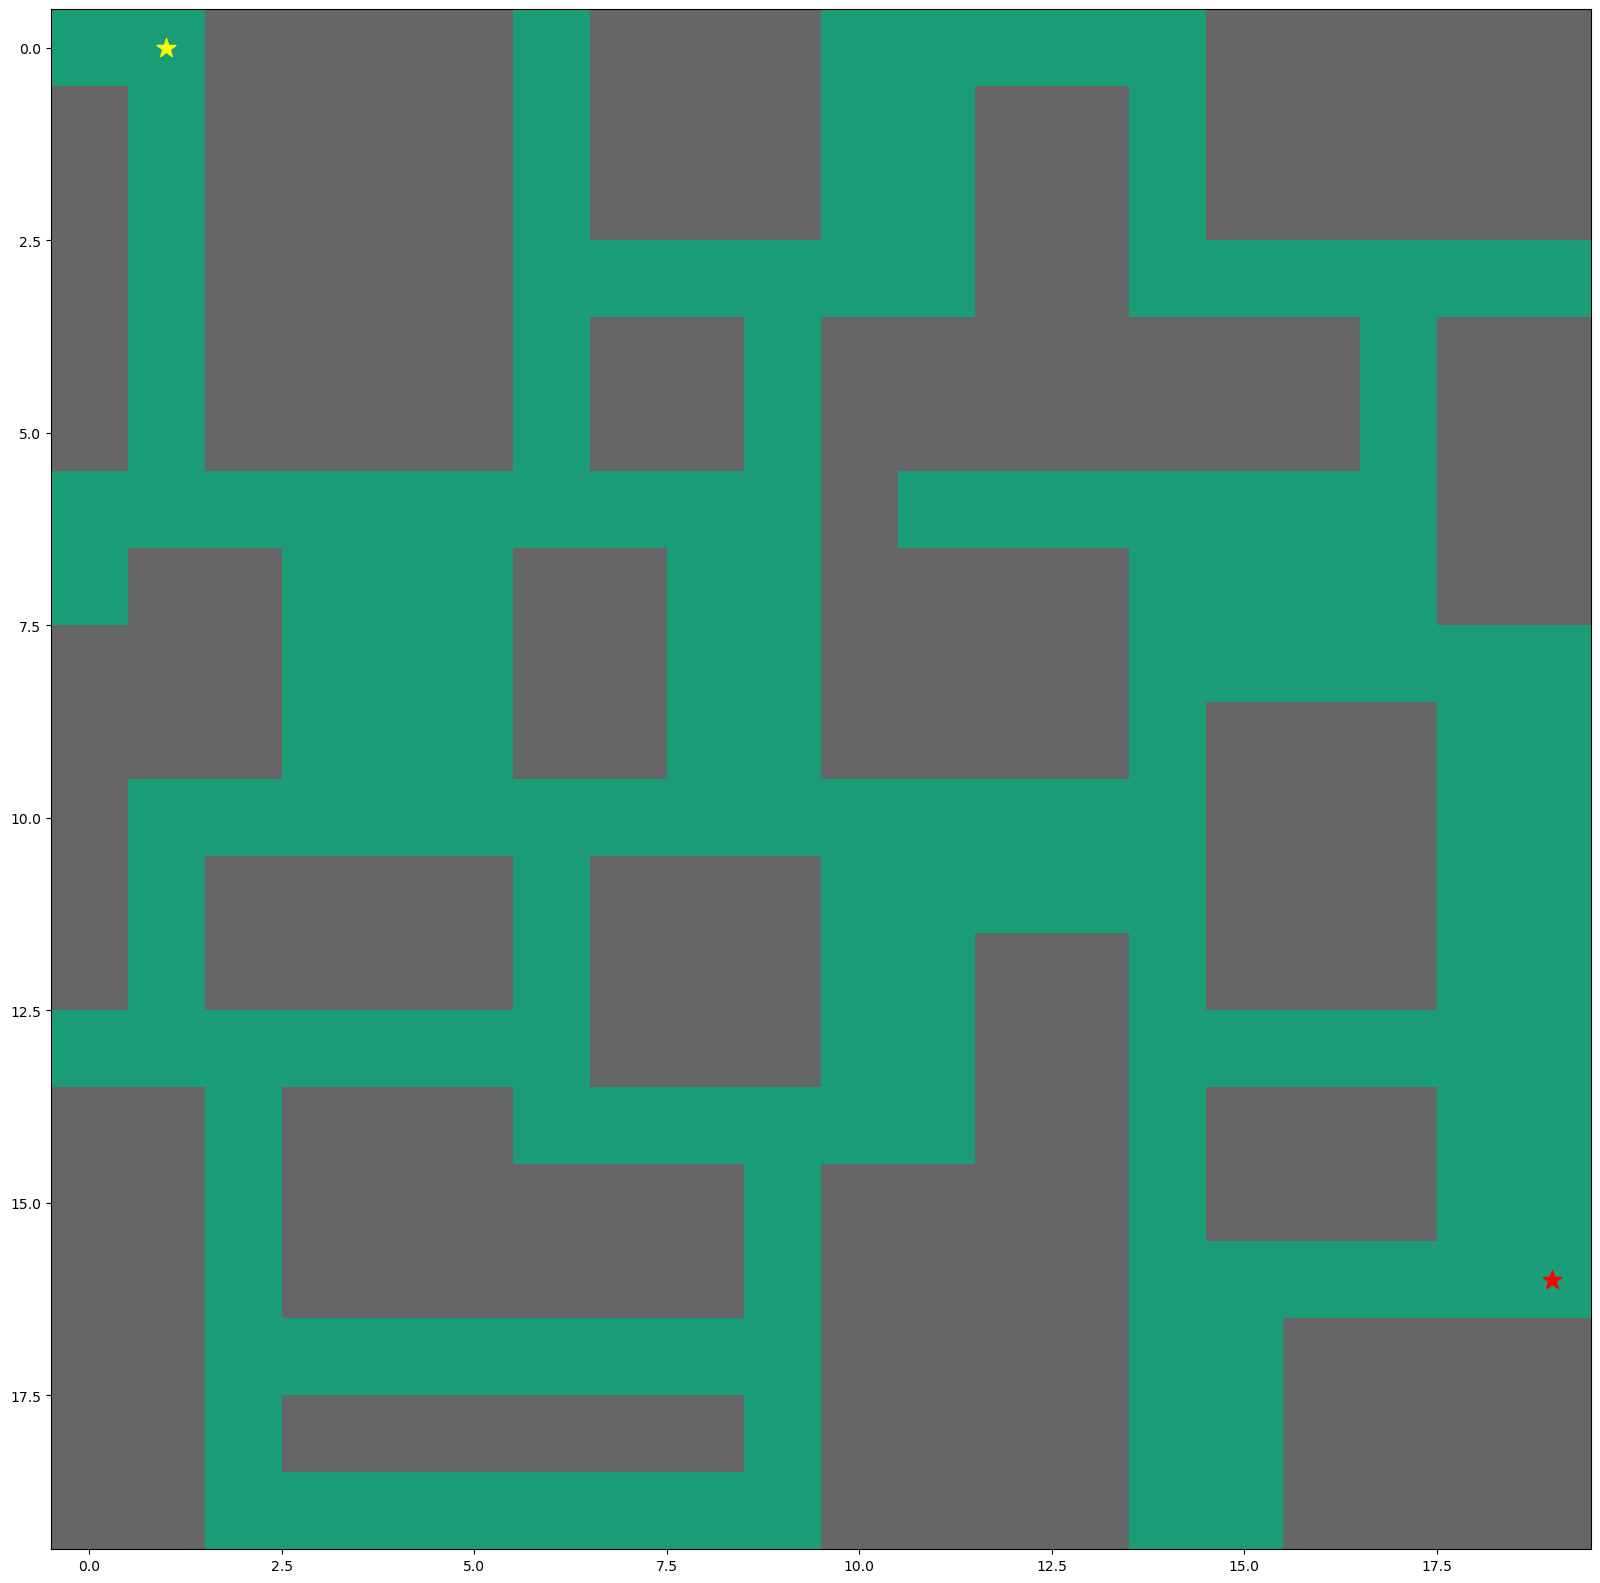

In [ ]:
illustrateRoute(nmap,inicio,fin)

Implementar el algoritmo con las dos heurísticas, tanto de ida como de vuelta

#### De ida

1.9969940185546875
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 9), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (11, 14), (12, 14), (13, 14), (13, 15), (13, 16), (13, 17), (13, 18), (14, 18), (15, 18), (15, 19), (16, 19)]


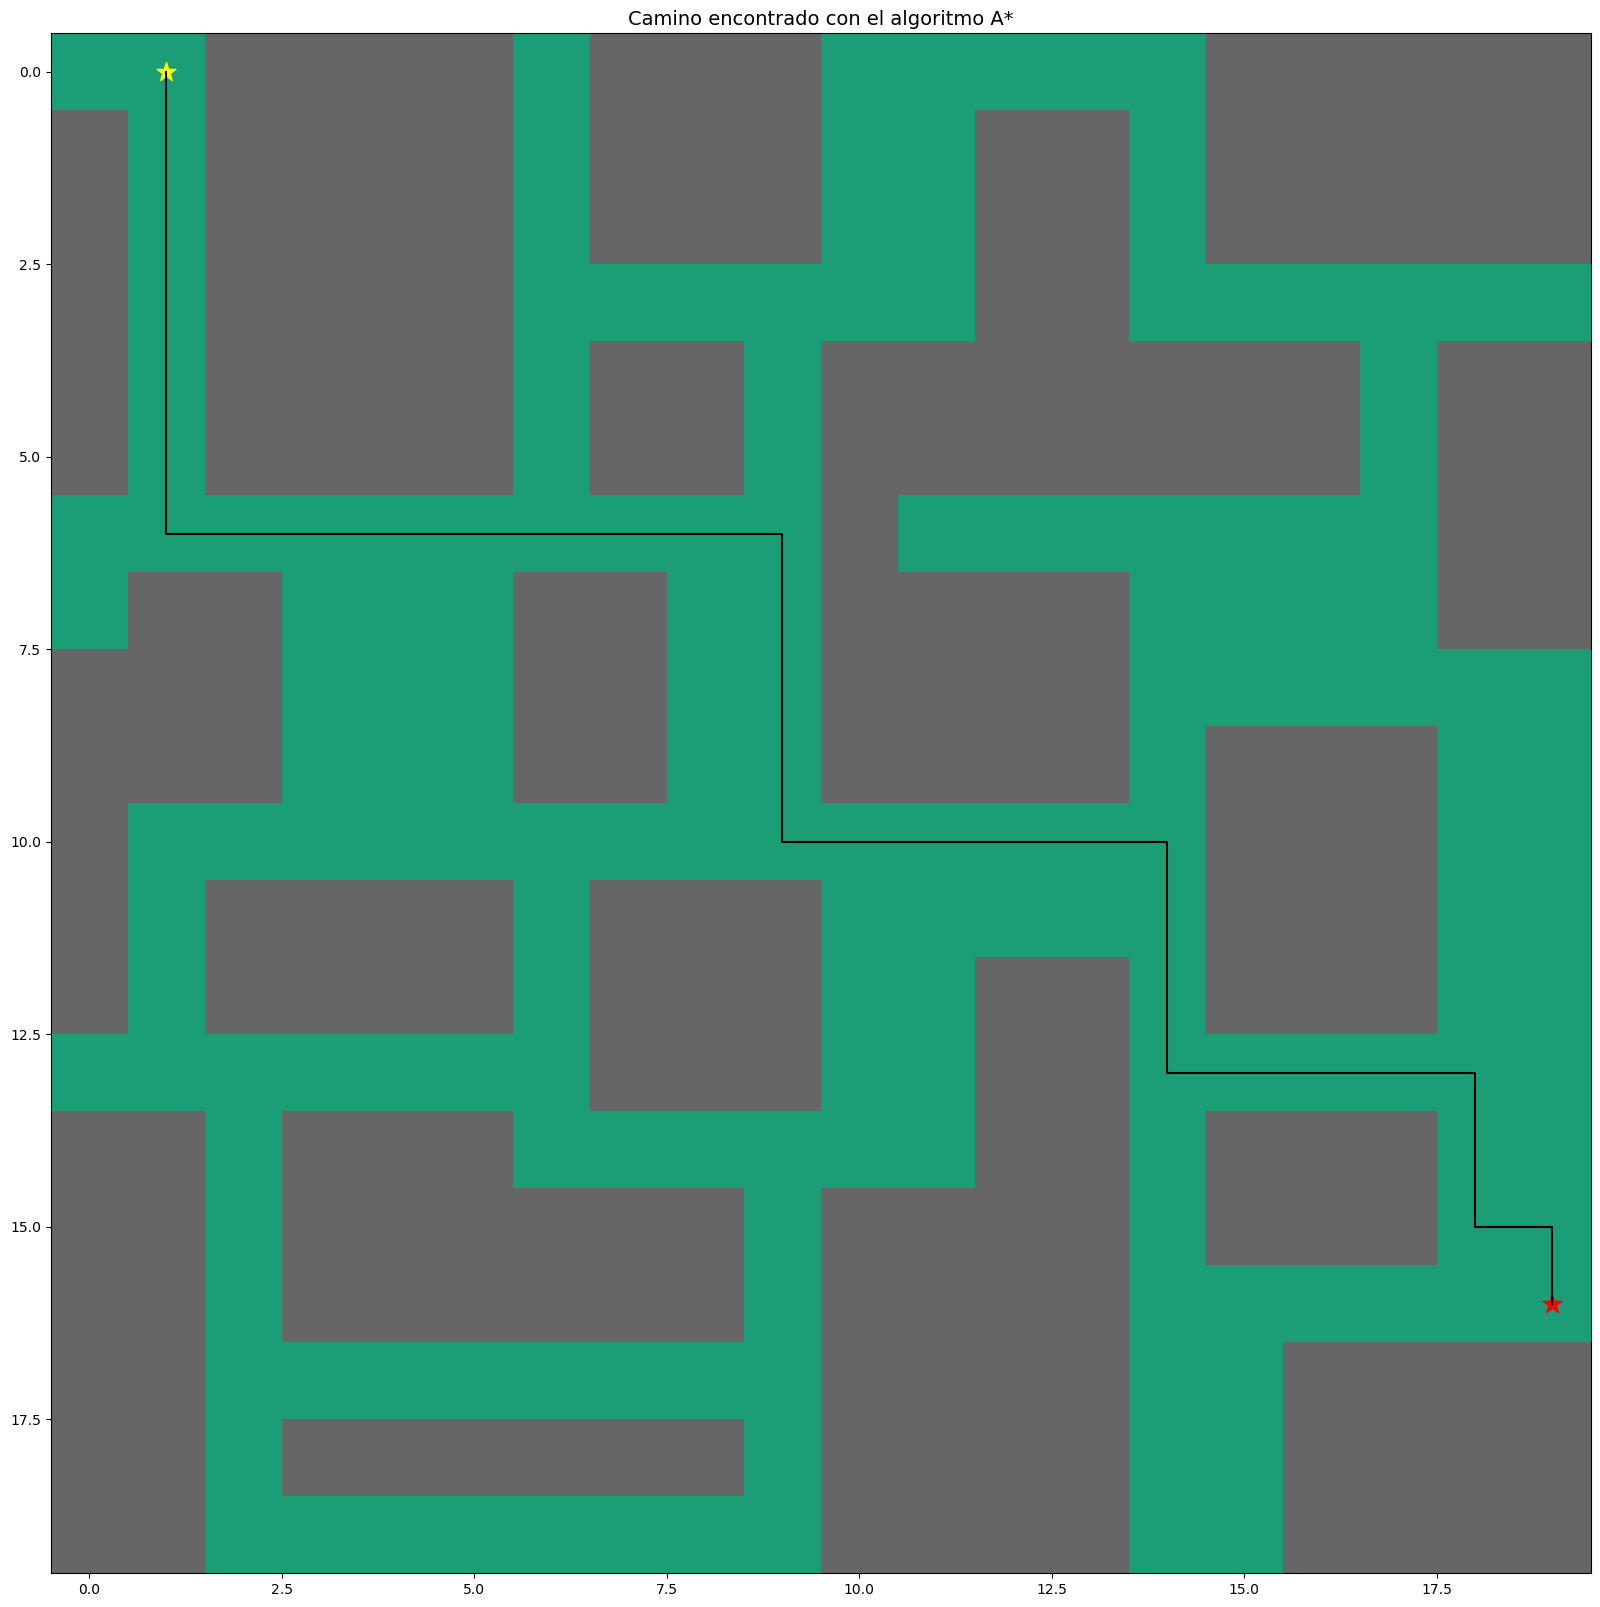

35

In [ ]:
routeManhattanIda=makePath(nmap,inicio,fin,1)
len(routeManhattanIda)

1.9977092742919922
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (7, 8), (8, 8), (9, 9), (10, 10), (10, 11), (10, 12), (11, 13), (12, 14), (13, 15), (13, 16), (13, 17), (14, 18), (15, 18), (16, 19)]


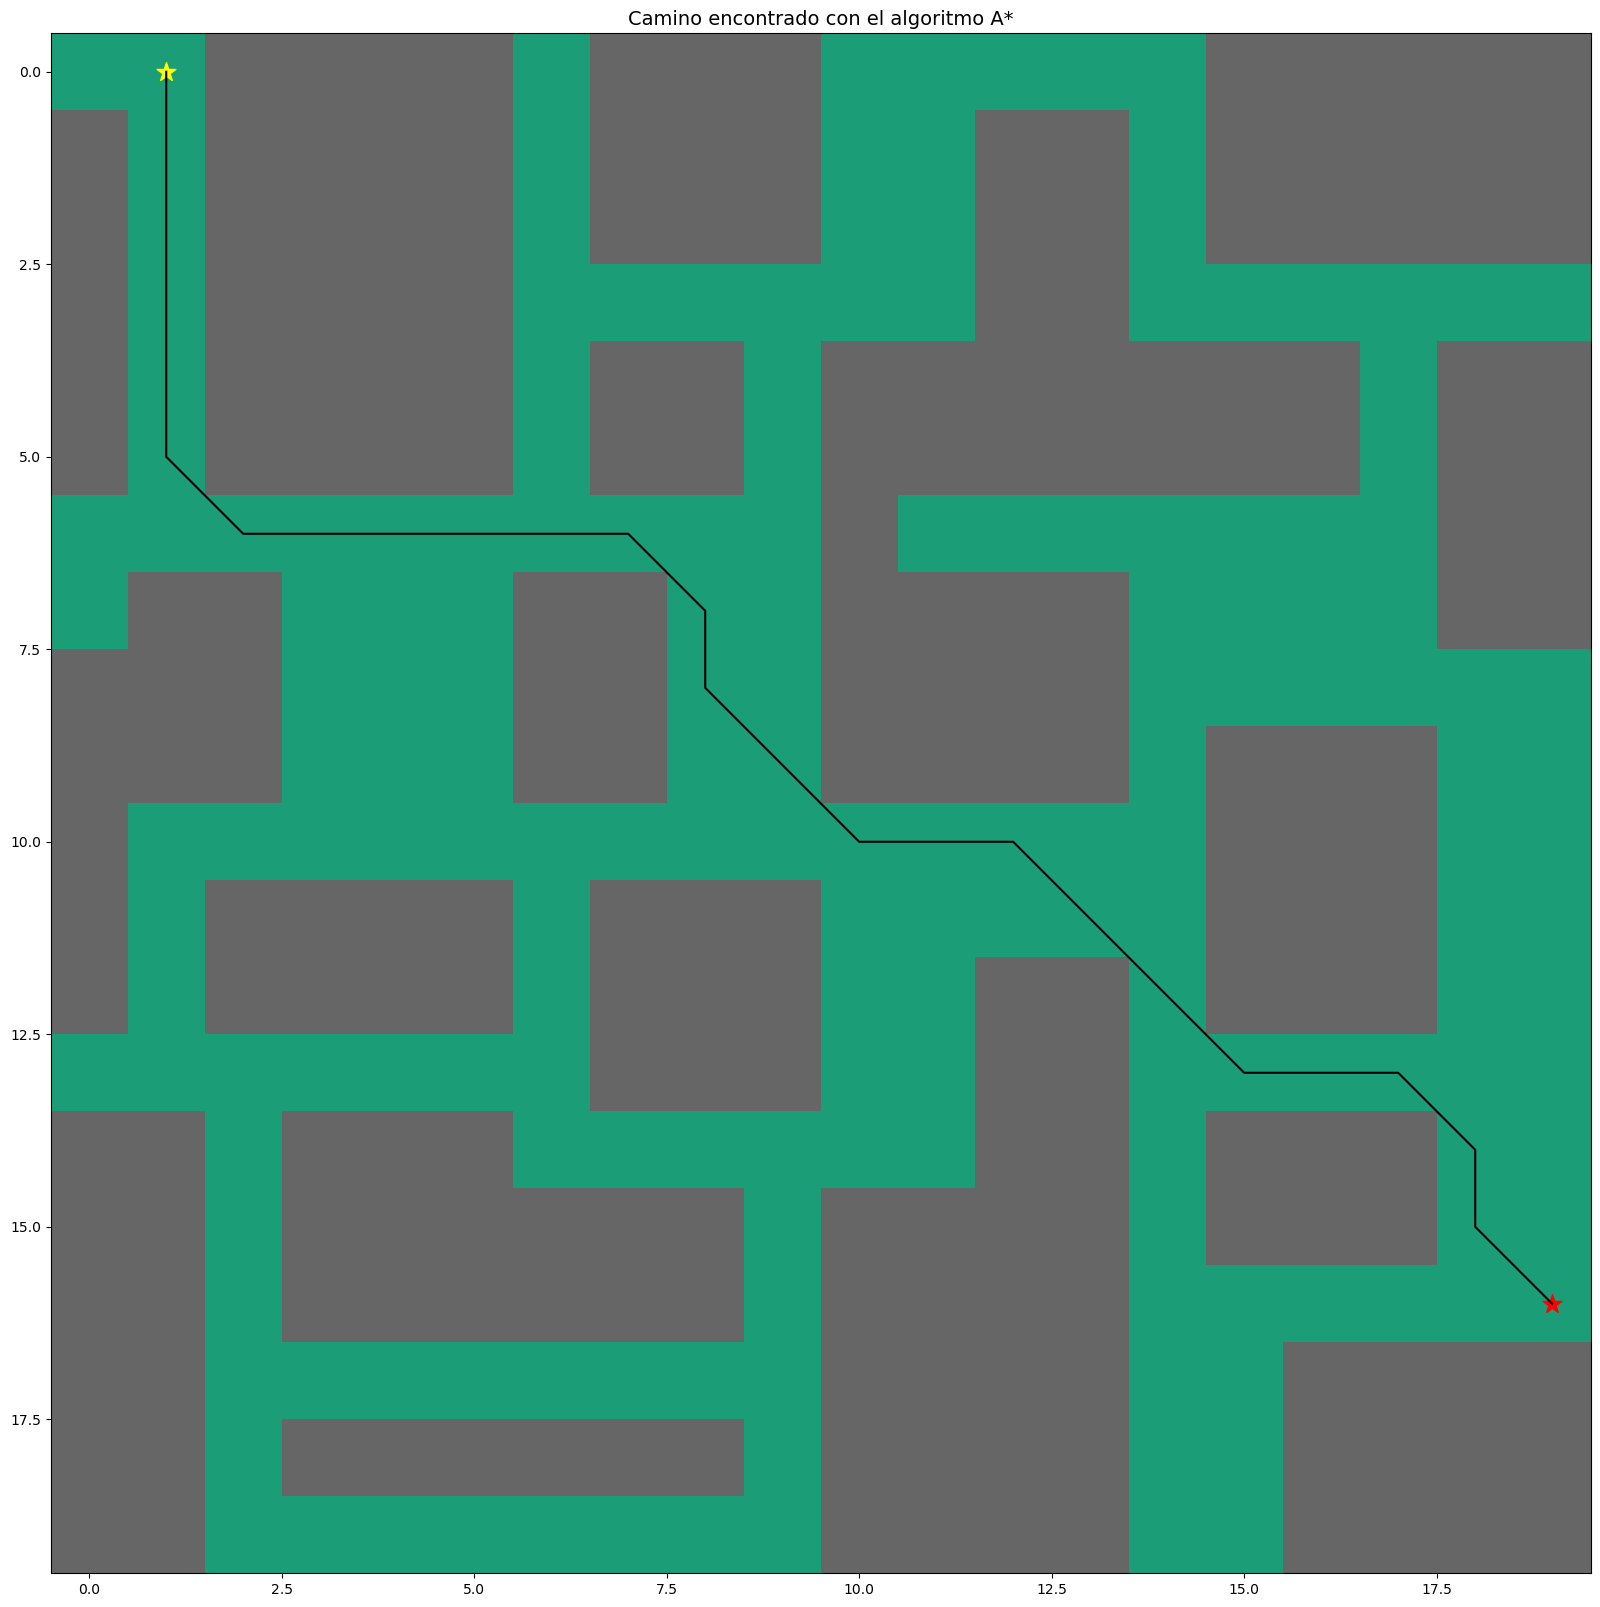

26

In [ ]:
routeEulcidianaIda=makePath(nmap,inicio,fin,0)
len(routeEulcidianaIda)

In [ ]:
inicio=(16,19)
fin=(19,2)

#### Segunda ruta

2.9921531677246094
[(16, 19), (16, 18), (16, 17), (16, 16), (16, 15), (16, 14), (15, 14), (14, 14), (13, 14), (12, 14), (11, 14), (11, 13), (11, 12), (11, 11), (11, 10), (12, 10), (13, 10), (14, 10), (14, 9), (15, 9), (16, 9), (17, 9), (17, 8), (17, 7), (17, 6), (17, 5), (17, 4), (17, 3), (17, 2), (18, 2), (19, 2)]


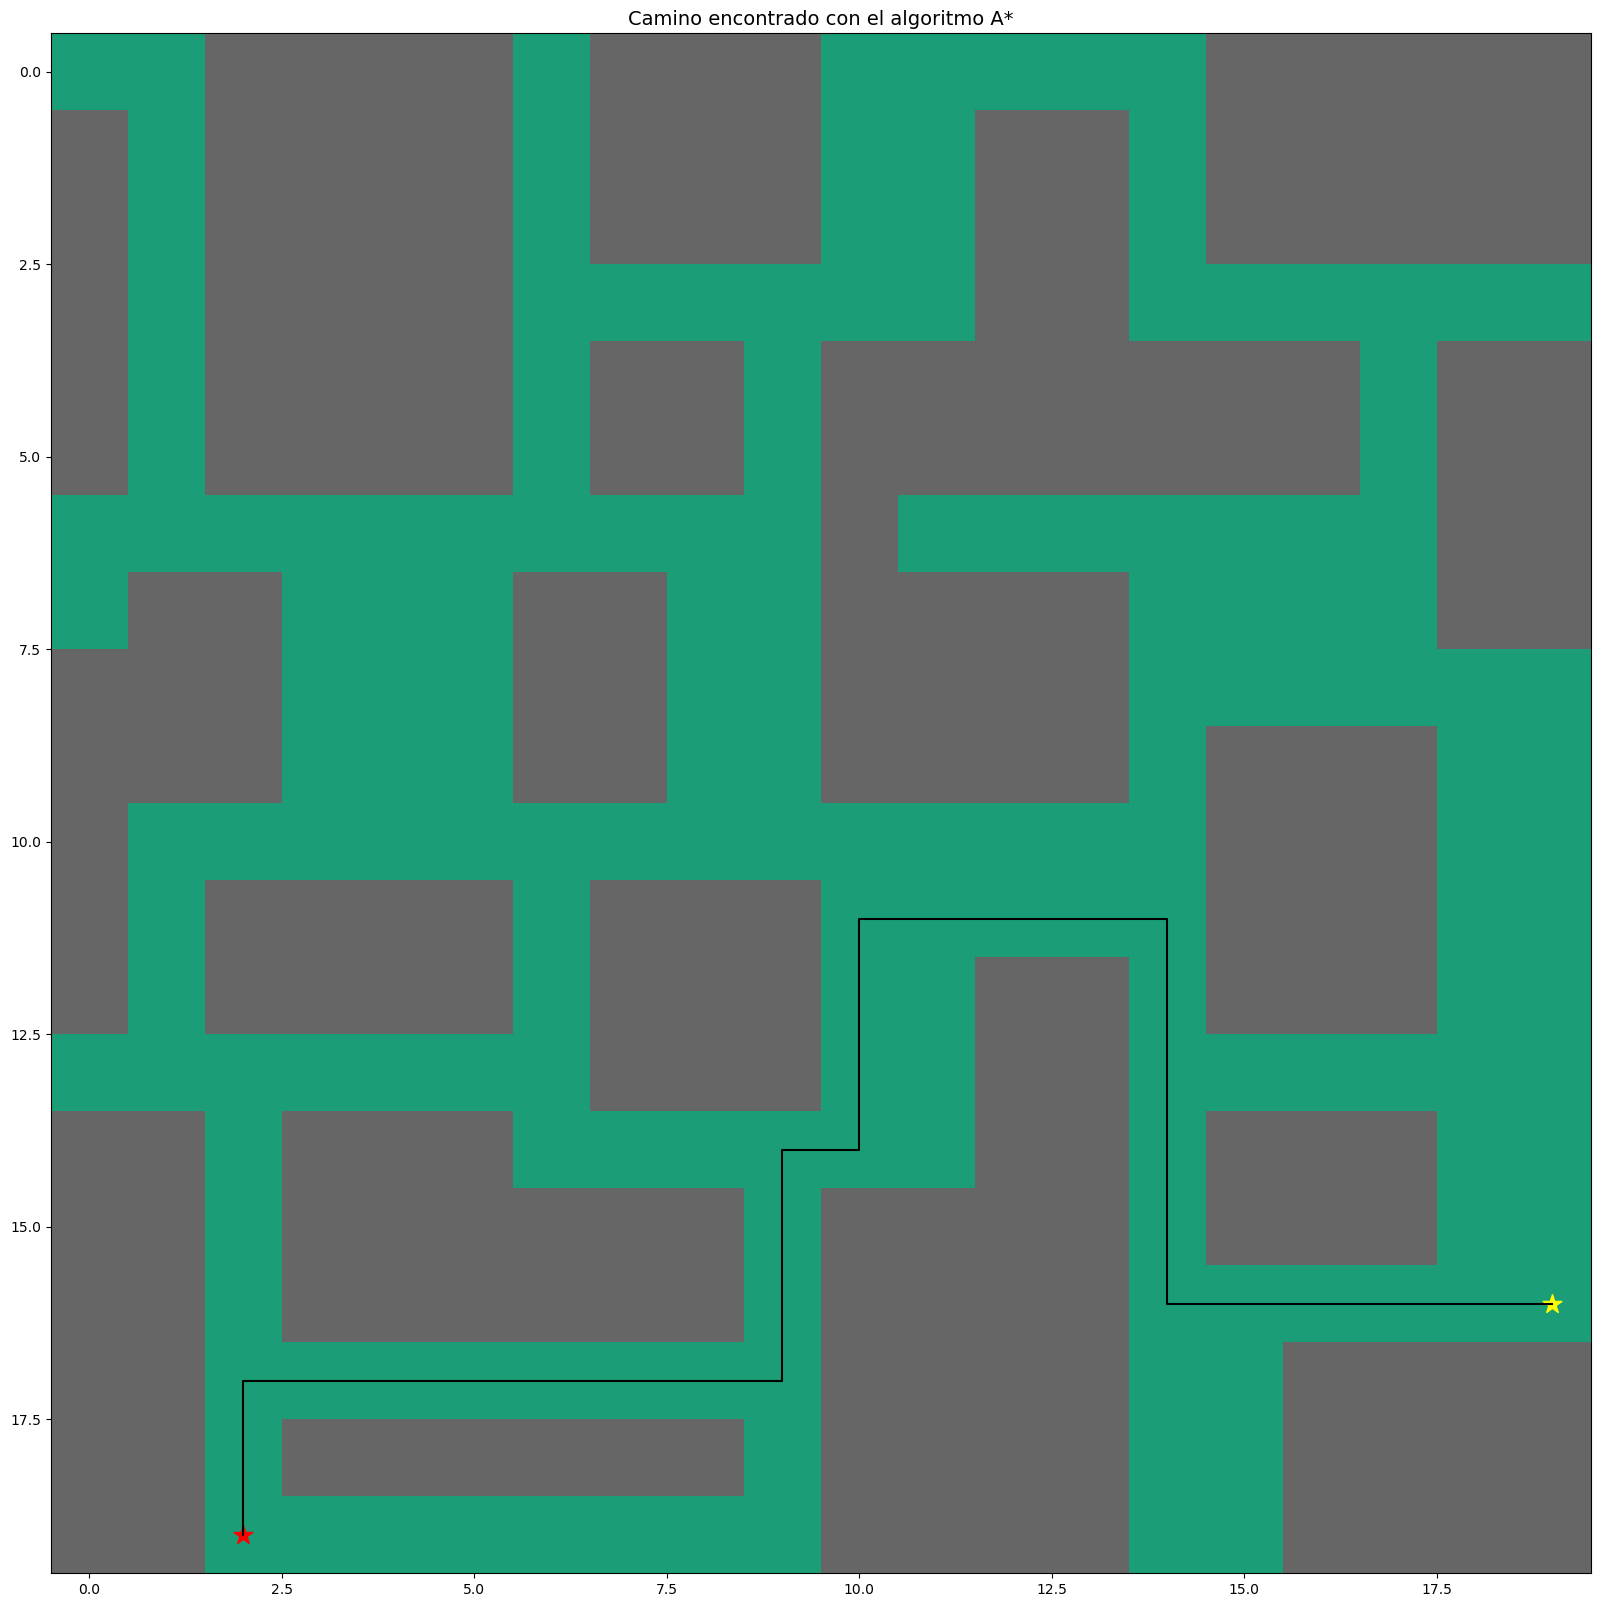

31

In [ ]:
routeManhattan2=makePath(nmap,inicio,fin,1)
len(routeManhattan2)

2.002239227294922
[(16, 19), (16, 18), (16, 17), (16, 16), (16, 15), (15, 14), (14, 14), (13, 14), (12, 14), (11, 13), (11, 12), (11, 11), (12, 10), (13, 10), (14, 9), (15, 9), (16, 9), (17, 8), (17, 7), (17, 6), (17, 5), (17, 4), (17, 3), (18, 2), (19, 2)]


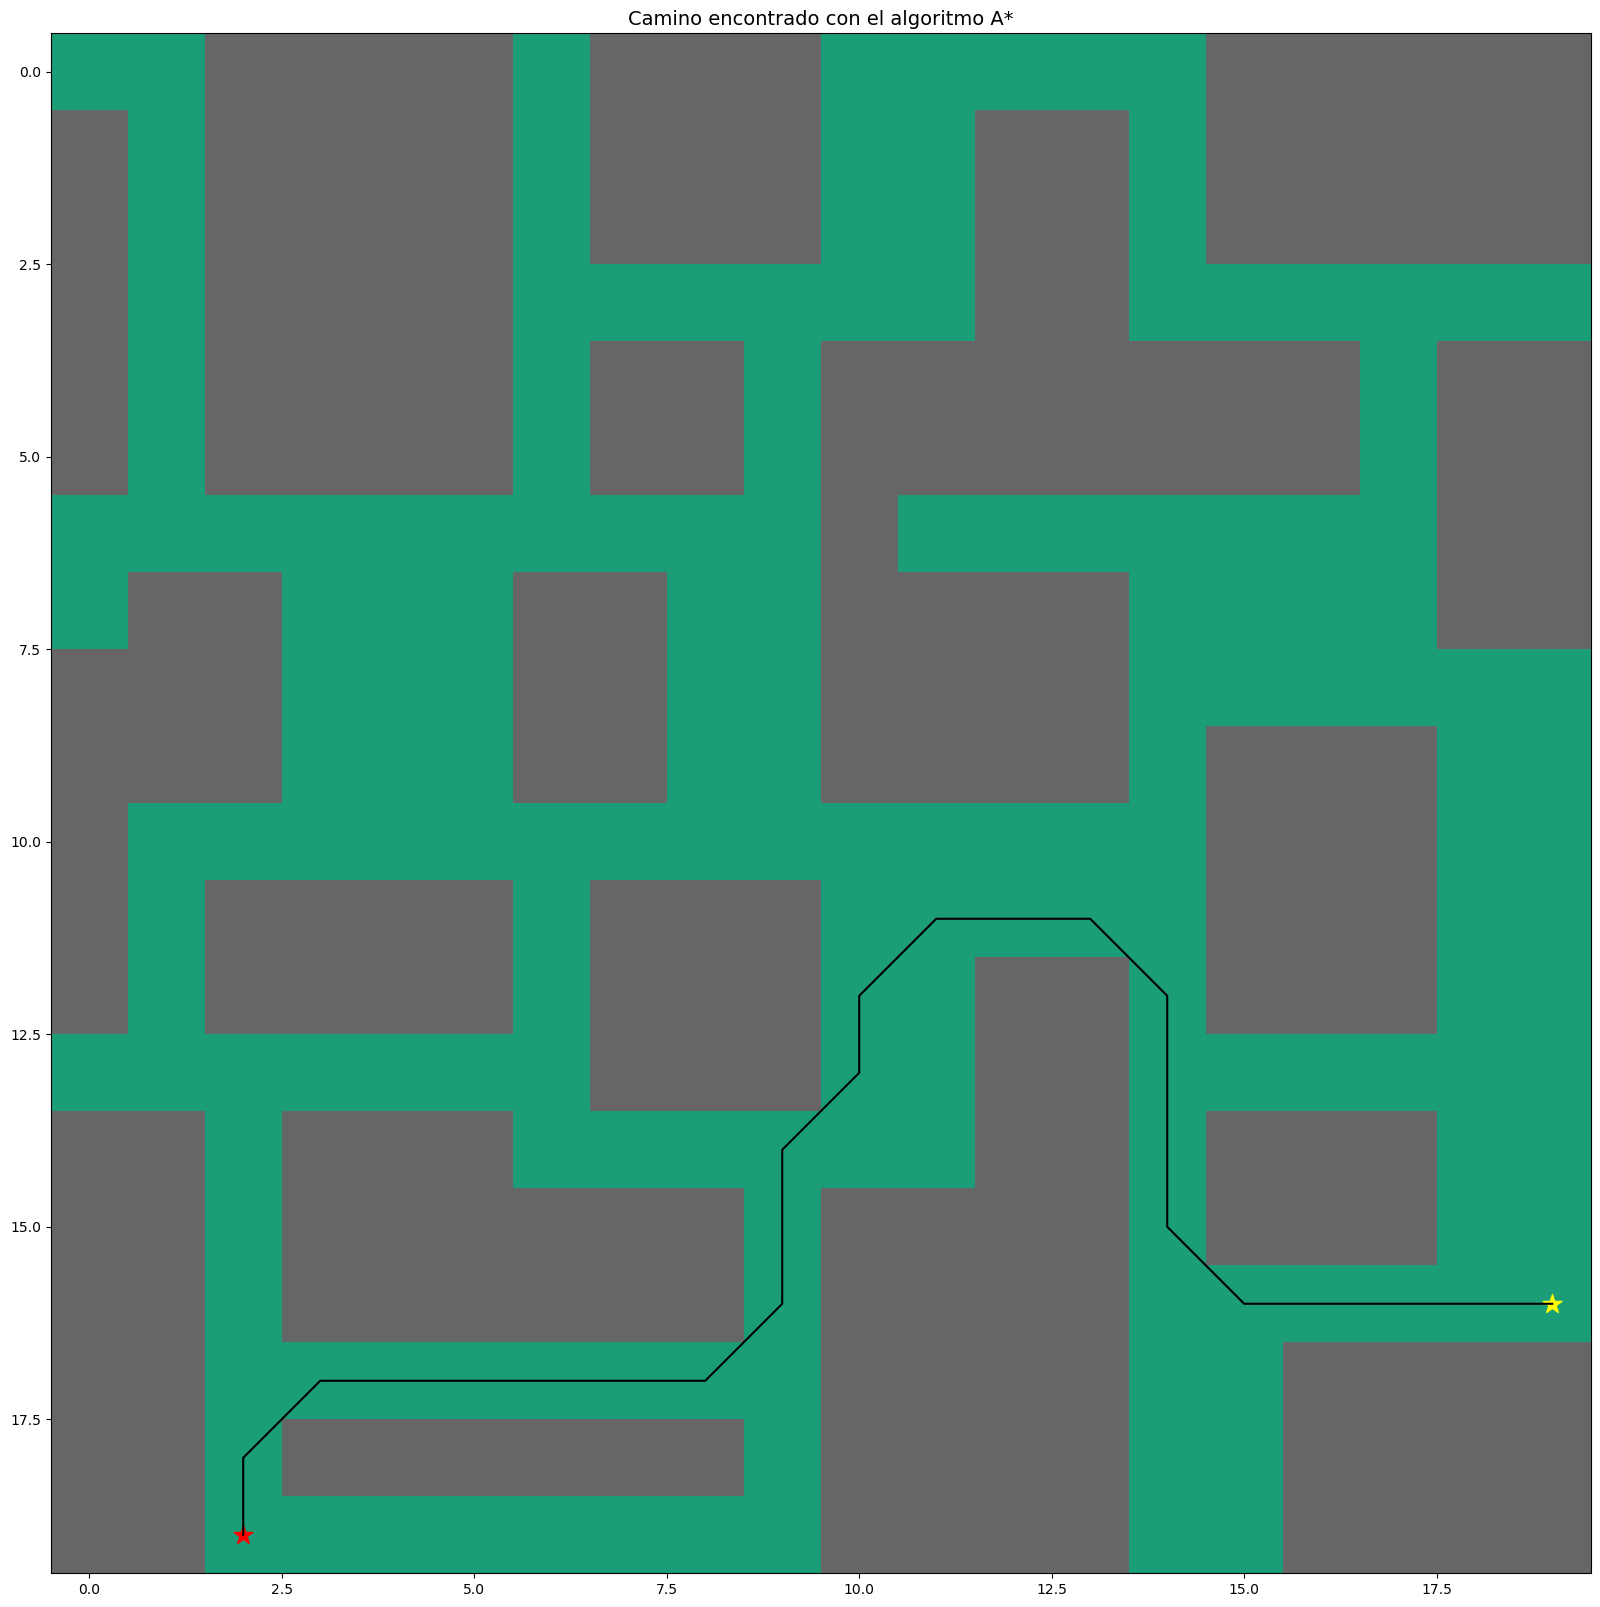

25

In [ ]:
routeEulcidiana2=makePath(nmap,inicio,fin,0)
len(routeEulcidiana2)

In [ ]:
inicio=(19,2)
fin=(0,13)

#### Tercera ruta

3.9975643157958984
[(19, 2), (18, 2), (17, 2), (16, 2), (15, 2), (14, 2), (13, 2), (13, 3), (13, 4), (13, 5), (13, 6), (12, 6), (11, 6), (10, 6), (10, 7), (10, 8), (9, 8), (8, 8), (7, 8), (6, 8), (6, 9), (5, 9), (4, 9), (3, 9), (3, 10), (2, 10), (2, 11), (1, 11), (0, 11), (0, 12), (0, 13)]


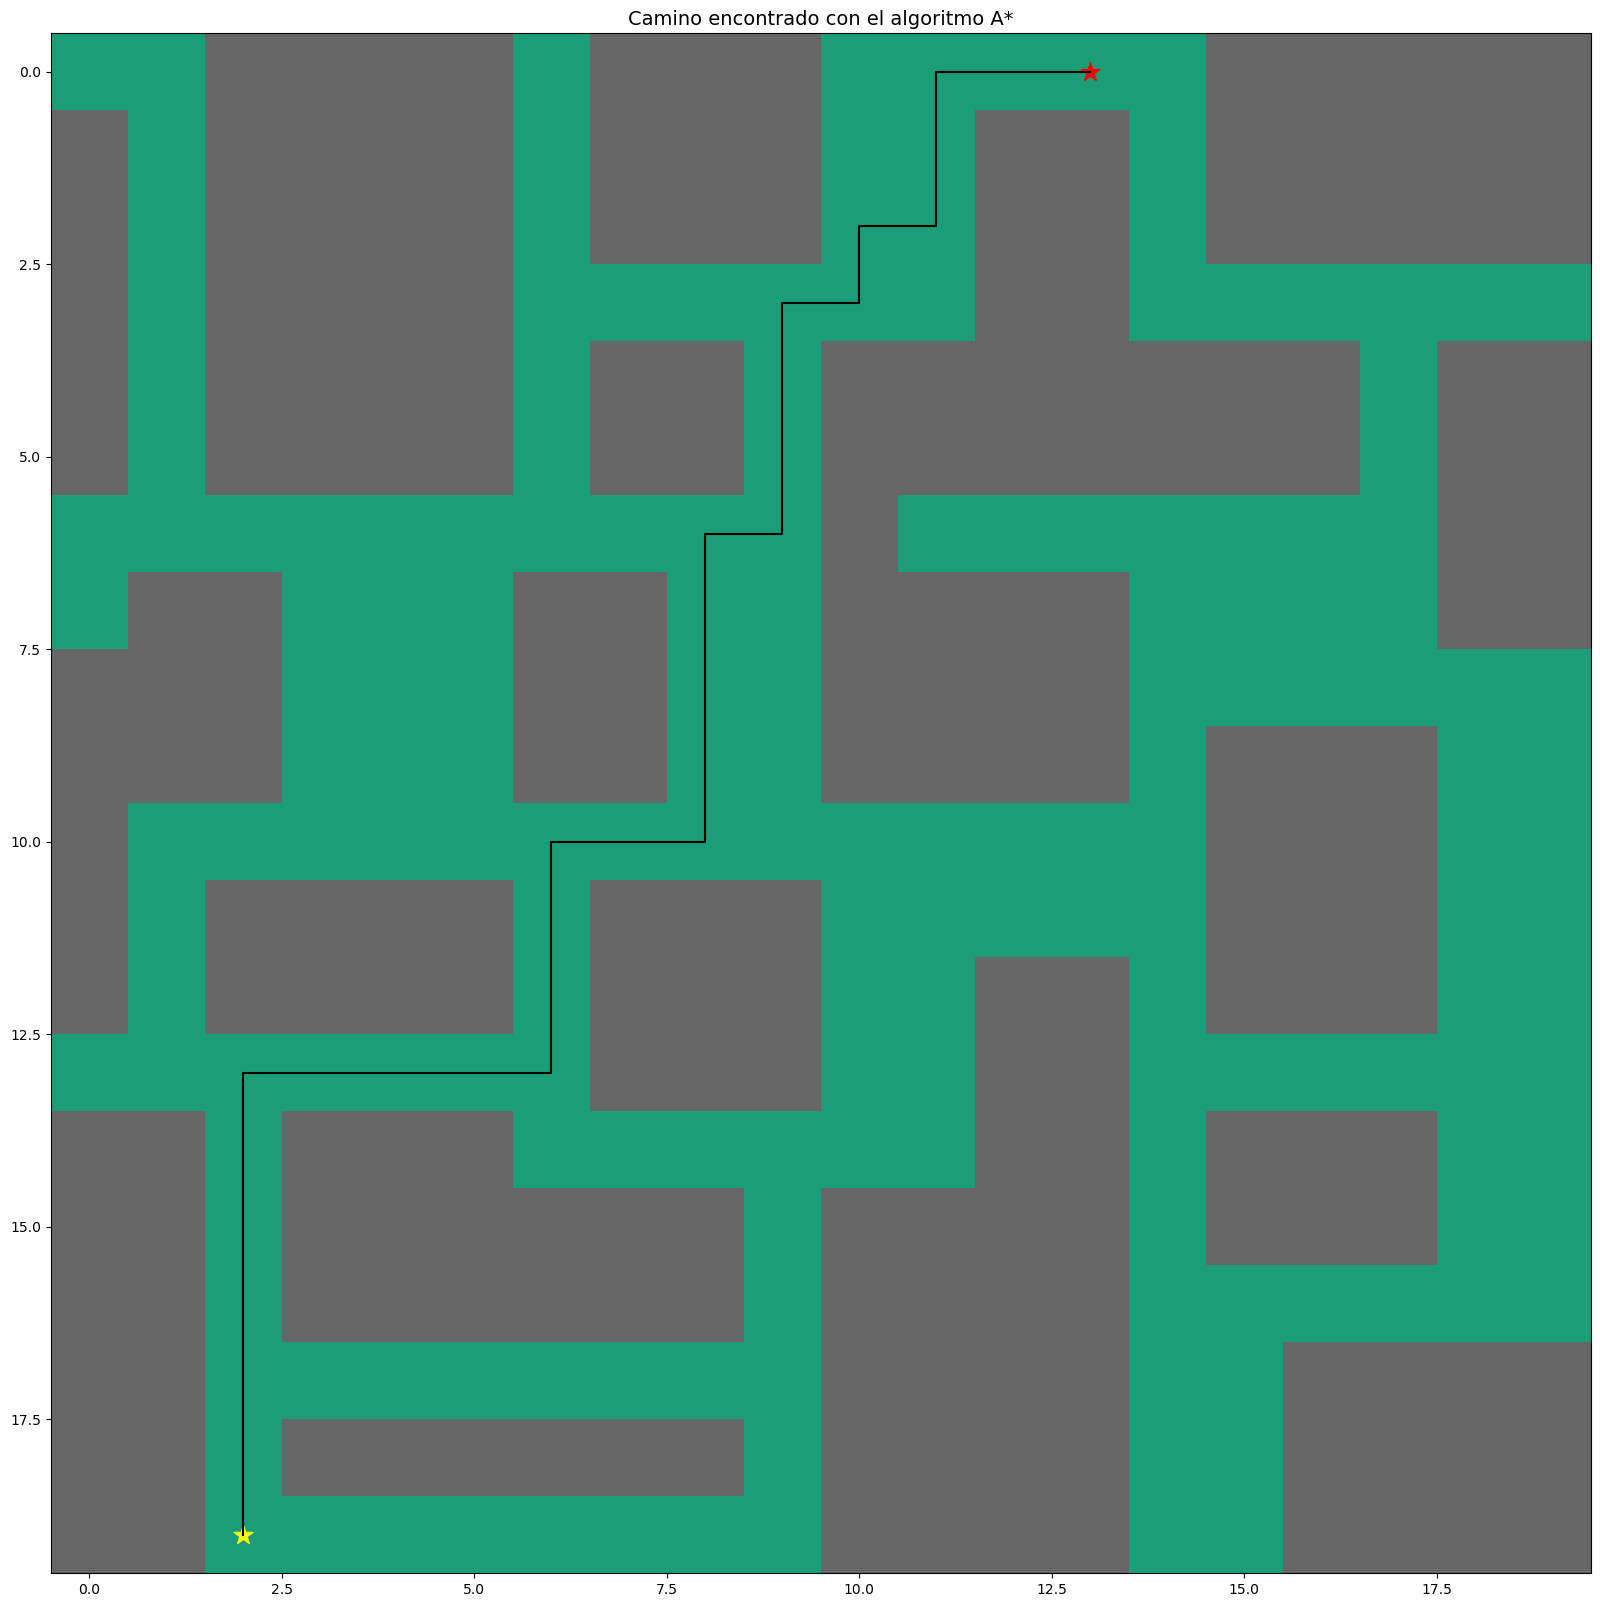

31

In [ ]:
routeManhattan3=makePath(nmap,inicio,fin,1)
len(routeManhattan3)

0.9989738464355469
[(19, 2), (18, 2), (17, 2), (16, 2), (15, 2), (14, 2), (13, 3), (13, 4), (13, 5), (12, 6), (11, 6), (10, 7), (9, 8), (8, 8), (7, 8), (6, 8), (5, 9), (4, 9), (3, 9), (2, 10), (1, 10), (0, 11), (0, 12), (0, 13)]


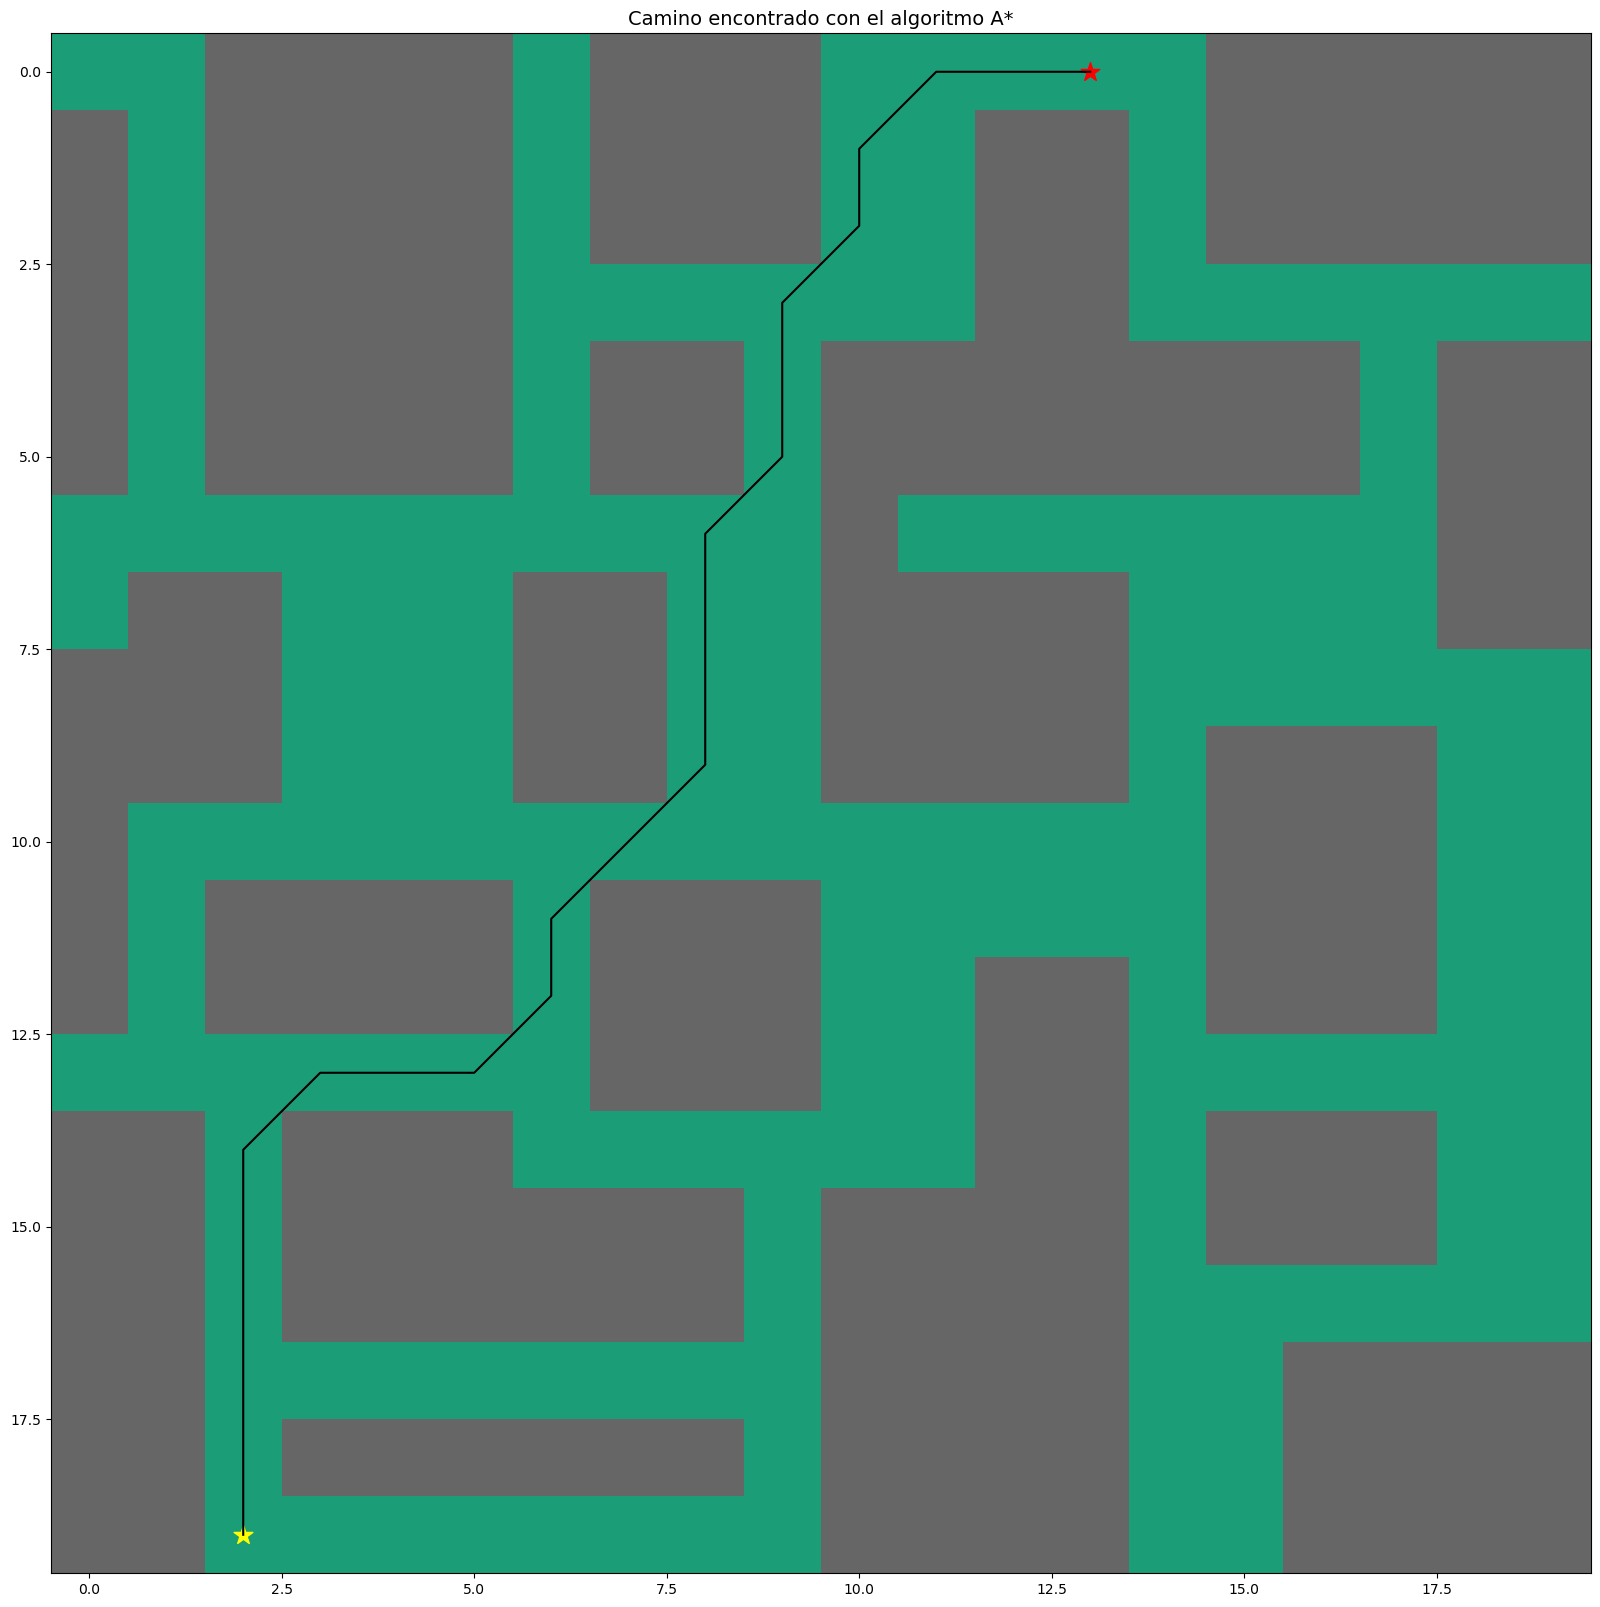

24

In [ ]:
routeEulcidiana3=makePath(nmap,inicio,fin,0)
len(routeEulcidiana3)

In [ ]:
inicio=(0,13)
fin=(19,14)

2.001523971557617
[(0, 13), (0, 14), (1, 14), (2, 14), (3, 14), (3, 15), (3, 16), (3, 17), (4, 17), (5, 17), (6, 17), (7, 17), (8, 17), (8, 16), (8, 15), (8, 14), (9, 14), (10, 14), (11, 14), (12, 14), (13, 14), (14, 14), (15, 14), (16, 14), (17, 14), (18, 14), (19, 14)]


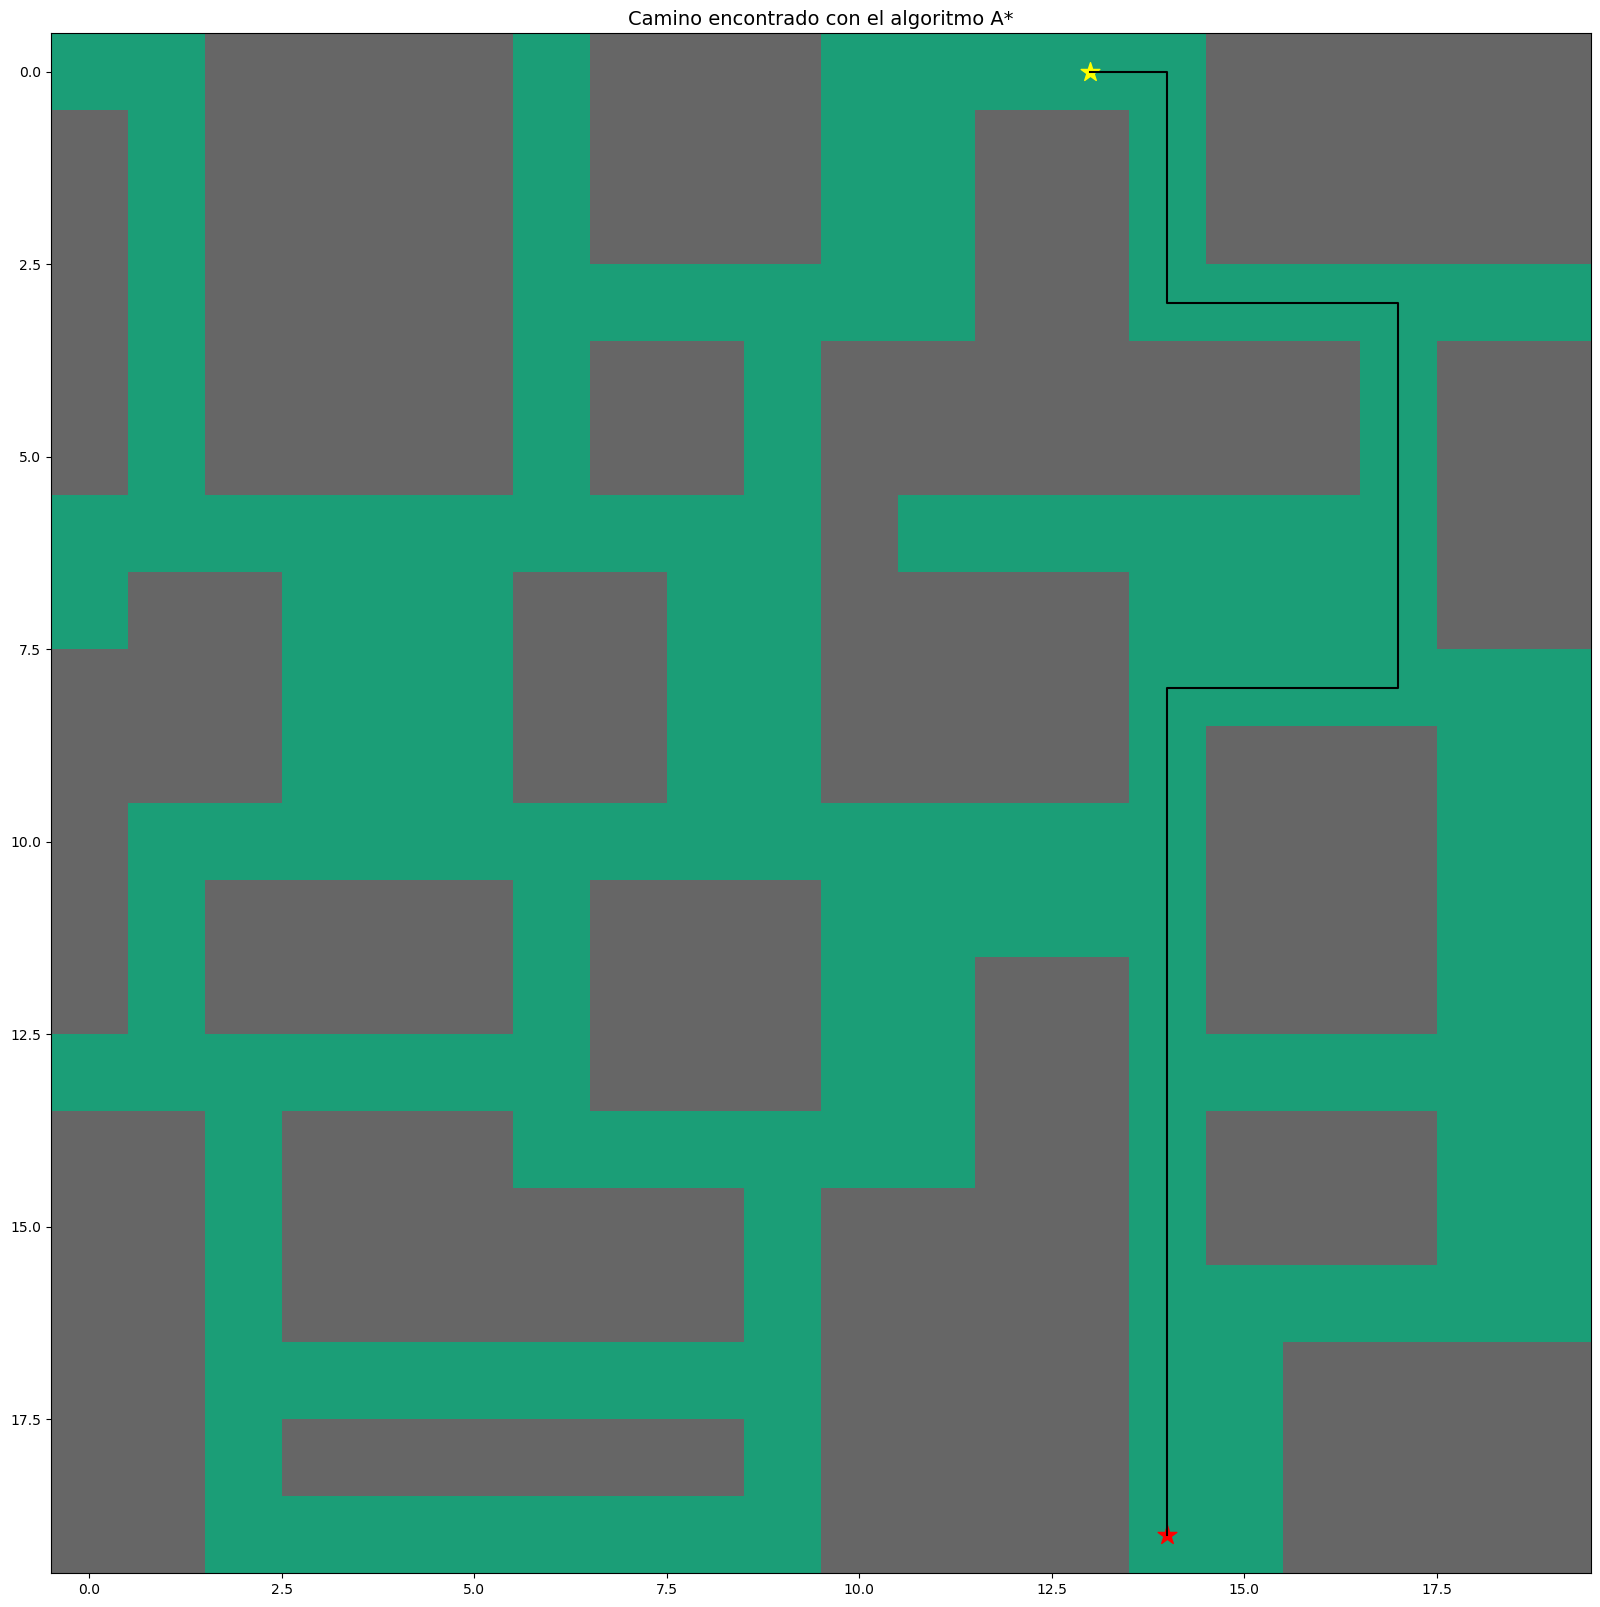

27

In [ ]:
routeManhattan4=makePath(nmap,inicio,fin,1)
len(routeManhattan4)

2.0112991333007812
[(0, 13), (1, 14), (2, 14), (3, 15), (3, 16), (4, 17), (5, 17), (6, 16), (6, 15), (7, 14), (8, 14), (9, 14), (10, 14), (11, 14), (12, 14), (13, 14), (14, 14), (15, 14), (16, 14), (17, 14), (18, 14), (19, 14)]


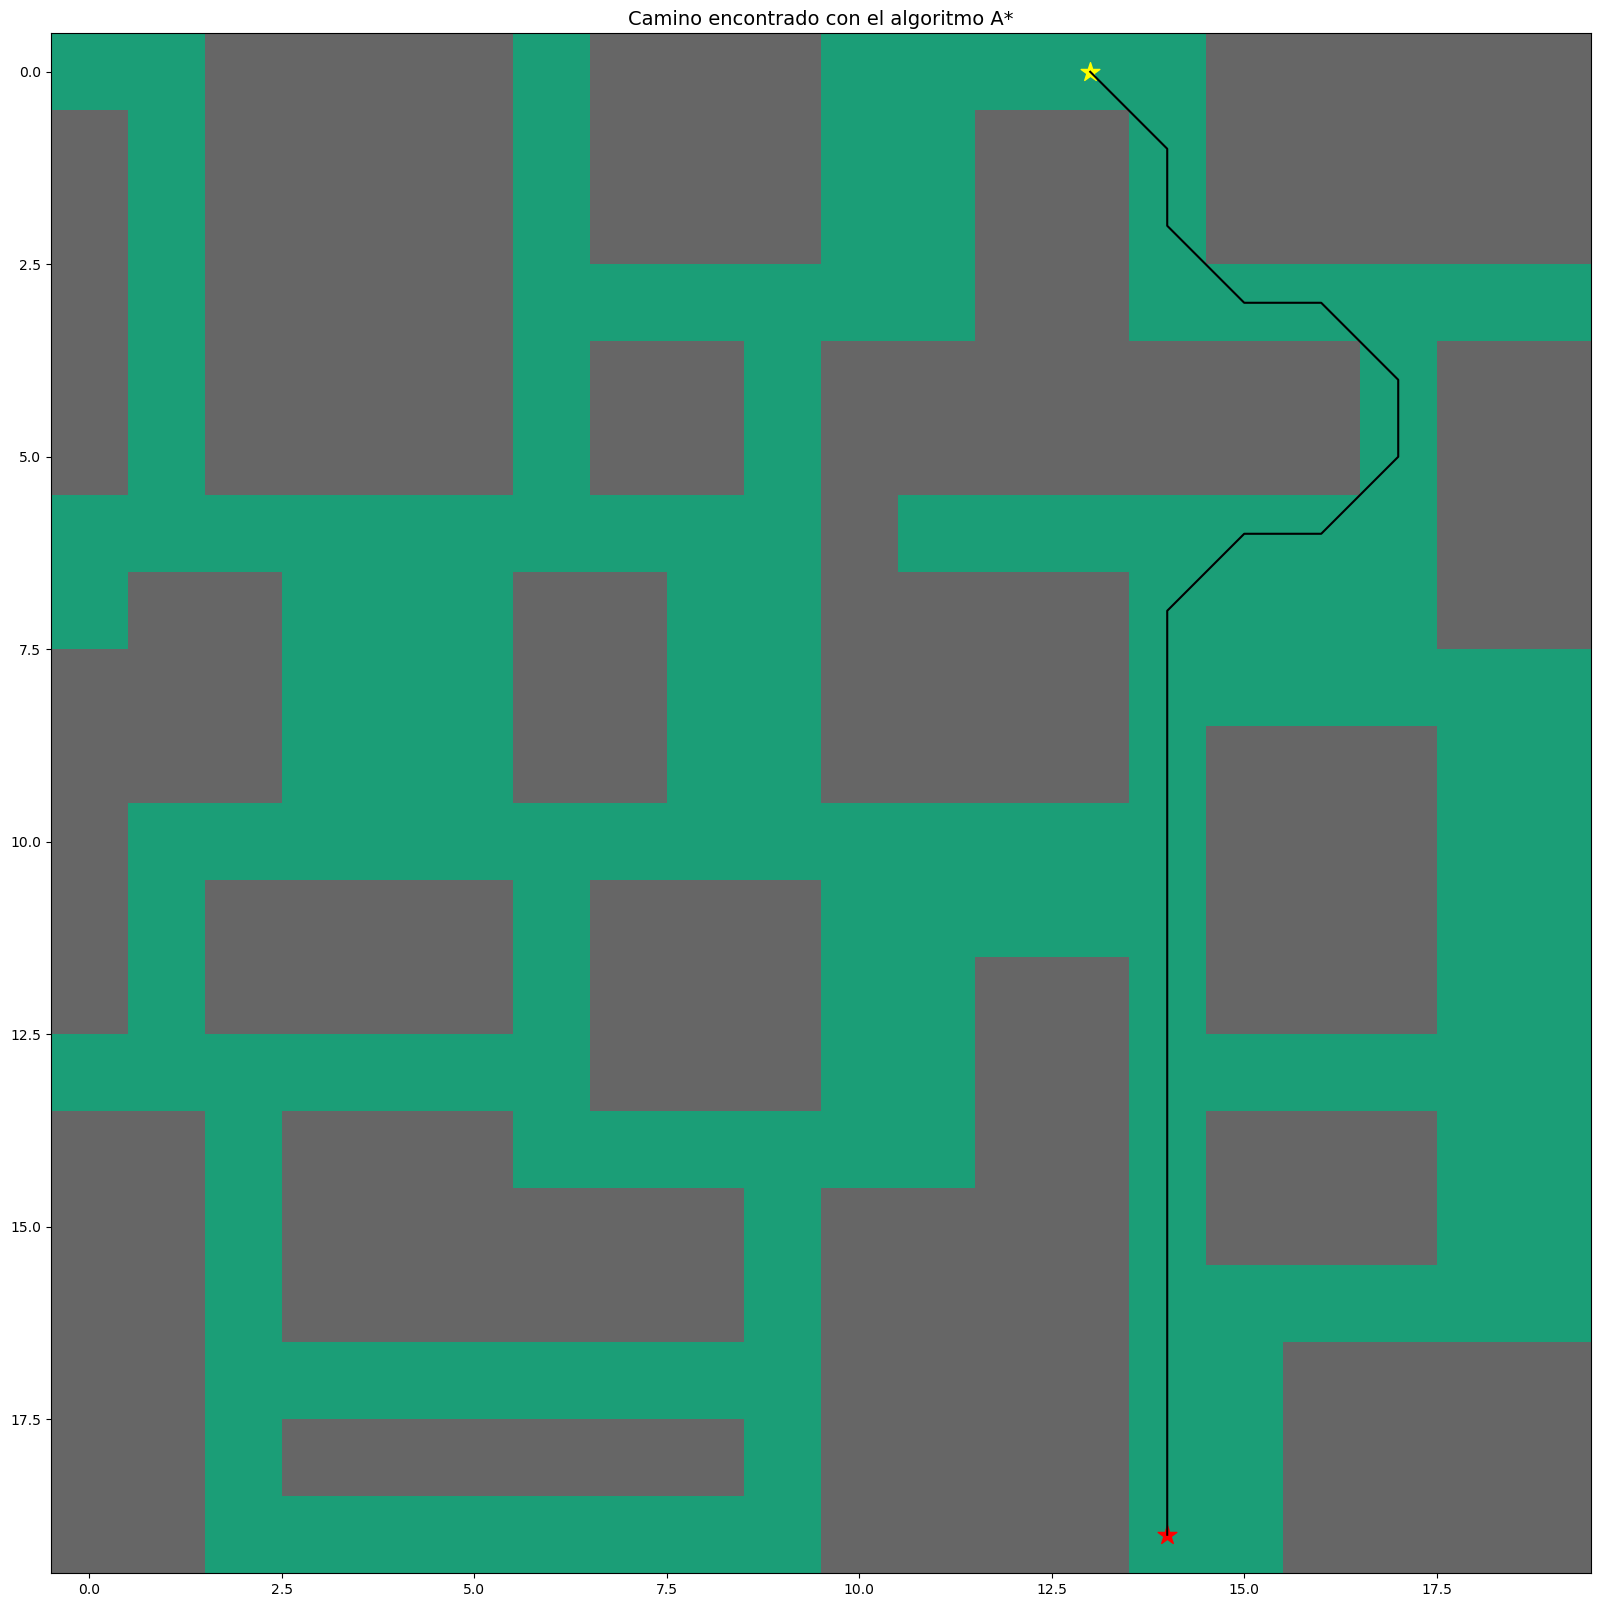

22

In [ ]:
routeEulcidiana4=makePath(nmap,inicio,fin,0)
len(routeEulcidiana4)